# Analyze Weights

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
survey_data_path = r"..\..\data\processed\data_model_output_no_synthetic_taz.csv"

In [6]:
# TODO: discuss how to handle critical validation errors
survey_data_base = pd.read_csv(survey_data_path, index_col = 'Unnamed: 0')
survey_data_initial_len = survey_data_base.shape[0]
survey_data_base = (
    survey_data_base
        .query("validation_severity_person != 'Critical'")
        .query("validation_severity_trip != 'Critical'")
)
print(f'dropped {survey_data_initial_len-survey_data_base.shape[0]} responses')

dropped 0 responses


C:\Users\mwe\AppData\Local\Temp\ipykernel_23904\4006929934.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,35,39,43,46,50,52,53,56,61,63,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,103,105,107,111,115,116,117,123,133,135,137,140,151,153,160,174,184,188,189,190,191,192,193,194,211,225,226,227,228,240,242) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_data_base = pd.read_csv(survey_data_path, index_col = 'Unnamed: 0')


# Weight Outliers

In [18]:
(
    survey_data_base[[
        'trip_arrival_time',
        'trip_arrival_time_label',
        'weight'
        ]]
        .sort_values('weight', ascending=False)
    )

,trip_arrival_time,trip_arrival_time_label,weight
4535,46.0,THREE_THIRTY_TO_FOUR,422.588130
4533,23.0,SIXTEEN_TO_SIXTEEN_THIRTY,422.588130
4004,5.0,SEVEN_TO_SEVEN_THIRTY,403.563916
964,3.0,SIX_TO_SIX_THIRTY,384.394451
1735,5.0,SEVEN_TO_SEVEN_THIRTY,336.943776
...,...,...,...
3901,3.0,SIX_TO_SIX_THIRTY,0.049957
2563,18.0,THIRTEEN_THIRTY_TO_FOURTEEN,0.049957
4627,11.0,TEN_TO_TEN_THIRTY,0.049957
3932,11.0,TEN_TO_TEN_THIRTY,0.049957


# TOD Distribution

C:\Users\mwe\AppData\Local\Temp\ipykernel_23904\2884949229.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.19418409]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  survey_time_cum_sum.loc[survey_time_cum_sum['trip_arrival_time']==i_time, 'cum_weight'] = i_bottom + i_weight


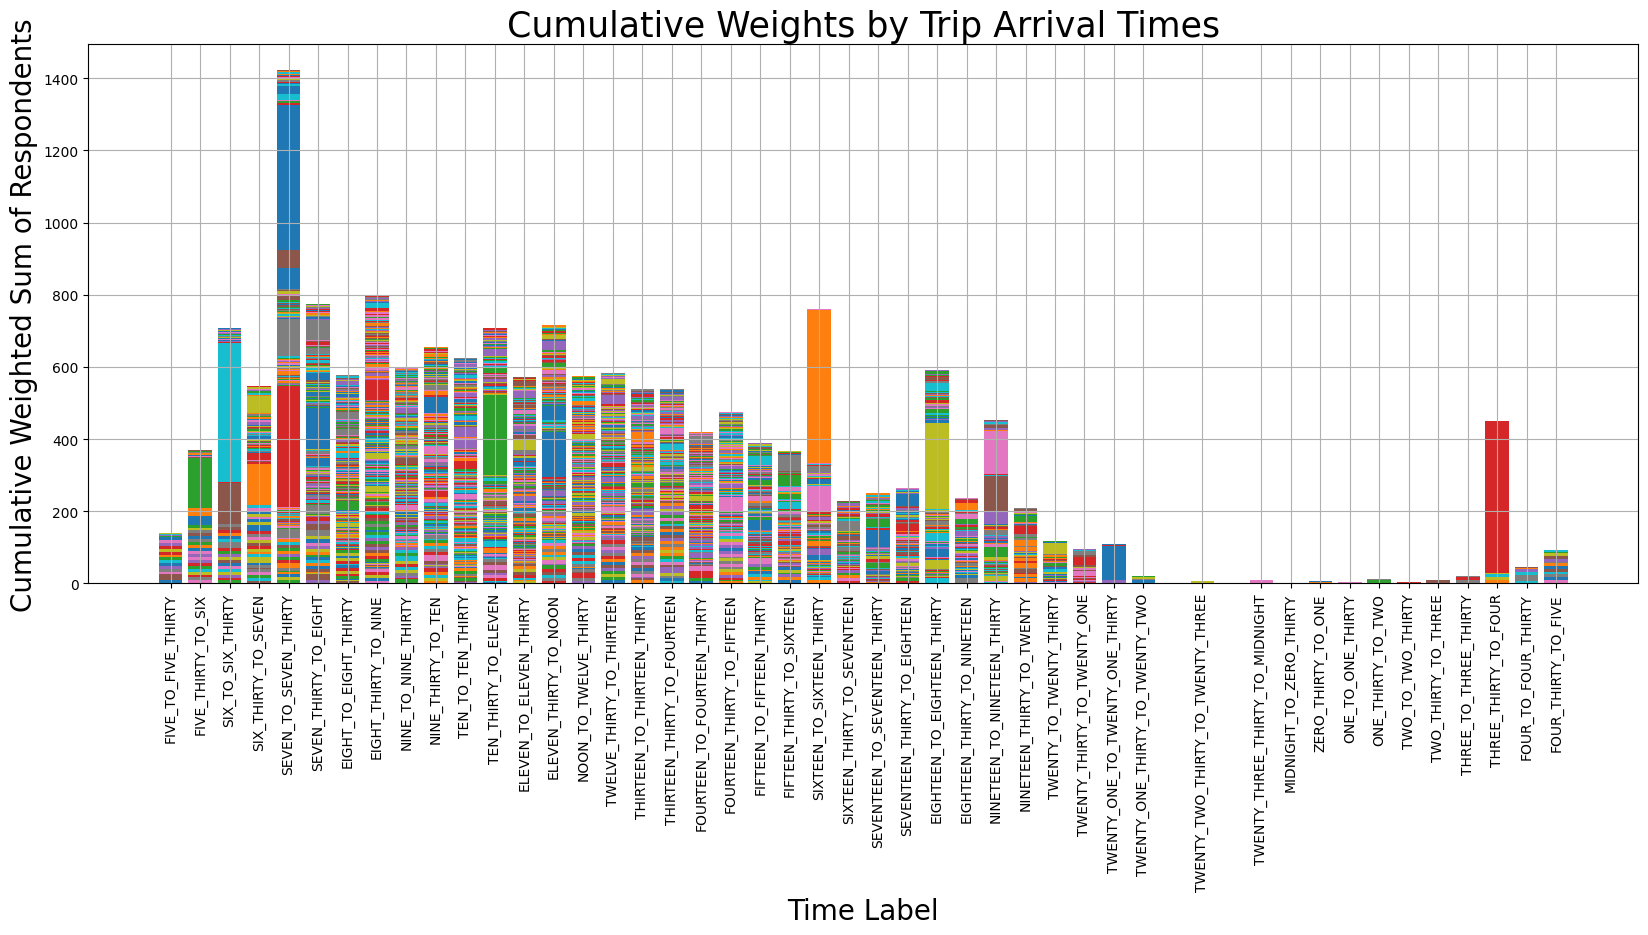

In [40]:
survey_time_cum_sum = (
    survey_data_base
        .groupby(['trip_arrival_time', 'trip_arrival_time_label'])
        ['weight']
        .sum()
        .reset_index(drop=False)
    )
survey_time_cum_sum['cum_weight'] = 0

fig, ax = plt.subplots(figsize=(20,7))
for i in survey_data_base.index:
    i_time = survey_data_base.loc[i,'trip_arrival_time']
    i_bottom = survey_time_cum_sum.loc[survey_time_cum_sum['trip_arrival_time']==i_time, 'cum_weight']
    i_weight = survey_data_base.loc[i,'weight']
    plt.bar(
        x = i_time,
        height = i_weight,
        bottom = i_bottom
        )
    survey_time_cum_sum.loc[survey_time_cum_sum['trip_arrival_time']==i_time, 'cum_weight'] = i_bottom + i_weight

plt.xticks(
    ticks = survey_time_cum_sum['trip_arrival_time'].tolist(),
    labels = survey_time_cum_sum['trip_arrival_time_label'].tolist()
)
ax.tick_params(axis='x', labelrotation=90)
plt.title(f'Cumulative Weights by Trip Arrival Times', fontsize=25)
plt.ylabel("Cumulative Weighted Sum of Respondents", fontsize=20)
plt.xlabel('Time Label', fontsize=20)
plt.grid()
plt.show()

In [ ]:
# investigate if enplanement controls affect employees